In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
df = pd.read_csv("../data/student-mat.csv",sep=';')
df.head()
print(df.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [7]:
df = df[['studytime','failures','absences','G1','G2','G3']]
df.describe()

,studytime,failures,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.035443,0.334177,5.708861,10.908861,10.713924,10.415190
std,0.839240,0.743651,8.003096,3.319195,3.761505,4.581443
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,2.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,2.000000,0.000000,8.000000,13.000000,13.000000,14.000000
max,4.000000,3.000000,75.000000,19.000000,19.000000,20.000000


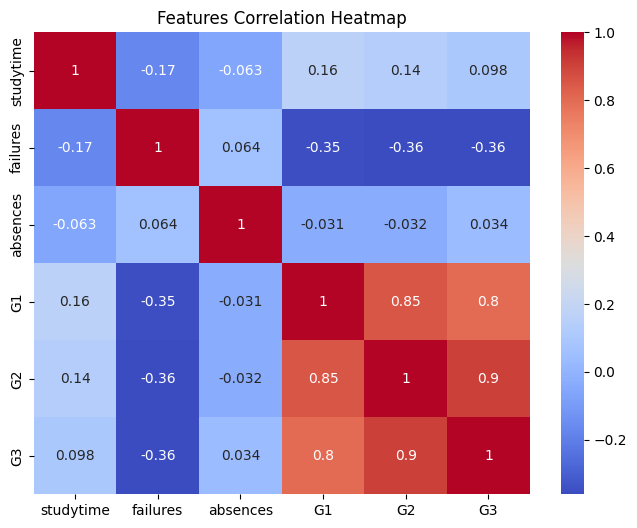

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Features Correlation Heatmap")
plt.show()

In [9]:
X = df.drop("G3", axis=1)
y = df["G3"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 1.3394159082670911
Mean Squared Error: 4.466503212015604
Root Mean Squared Error: 2.1134103274129243
R2 Score: 0.7821754247320556


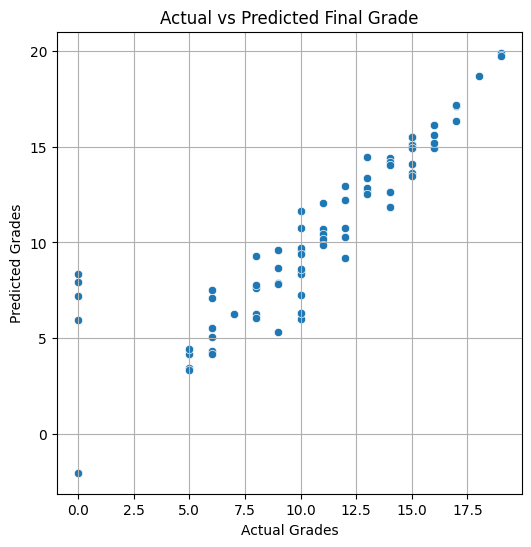

In [13]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Final Grade")
plt.grid(True)
plt.show()

In [14]:
with open("../model/model.pkl", "wb") as f:
    pickle.dump(model, f)